In [1]:
import pandas as pd
import numpy as np
import requests
import datetime
import json

# Yahoo Finance - Import yfinance package
import yfinance as yf

#functions
import functions as f

In [2]:
# Set Lookback
lookback_window = 30

today = datetime.date.today()
days = datetime.timedelta(lookback_window)
lookback = today - days

start_date = lookback
end_date = today
print('Start Date: '+str(start_date))
print('End Date: '+str(end_date))

Start Date: 2022-03-22
End Date: 2022-04-21


BTC/USD


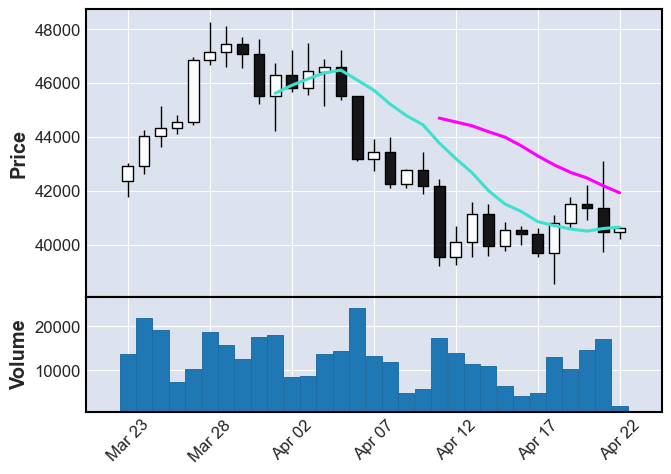

ETH/USD


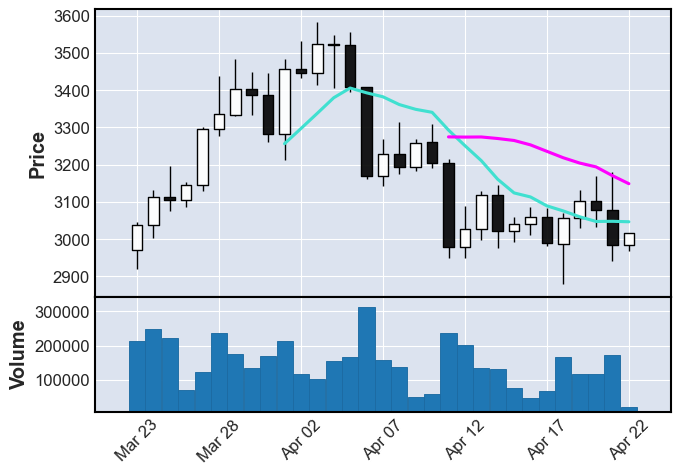

In [3]:
# Crypto data analysis
ticker_crypto = ['BTC/USD','ETH/USD']

for i in ticker_crypto:
    # Get the data
    data = f.fetch_daily_data(i)
    date_candle = pd.read_csv(data,index_col=['date'],parse_dates=True,chunksize=1000)
    date_candle = pd.concat((x.query("date > %a"%(start_date)) for x in date_candle))
    date_candle = date_candle.sort_values(by='date')

    print(i)
    f.candle_stick(date_candle)

[*********************100%***********************]  1 of 1 completed
AAPL


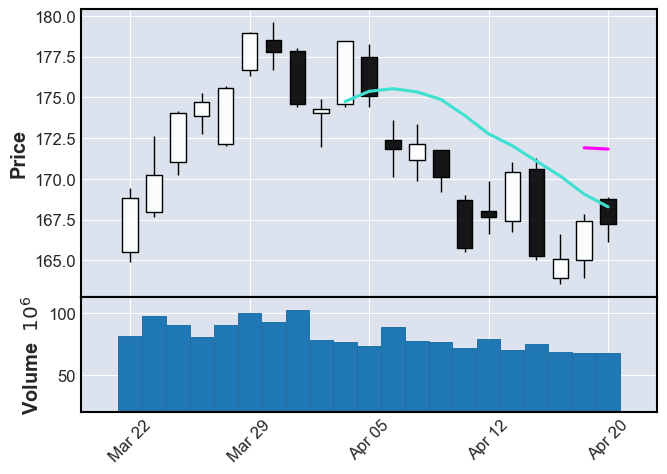

[*********************100%***********************]  1 of 1 completed
NDAQ


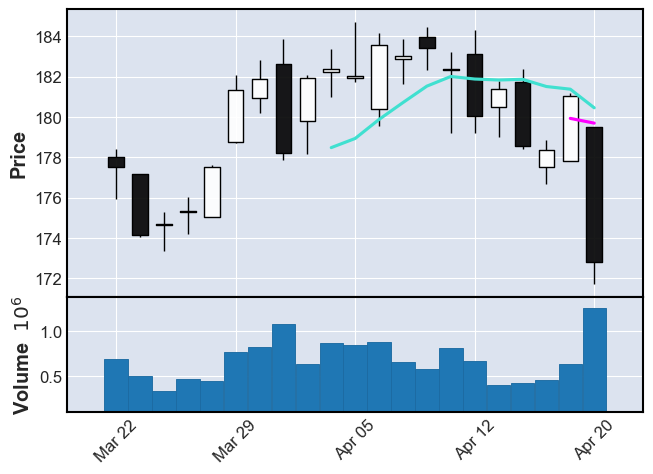

In [4]:
# Stock market data analysis

# Set the ticker
ticker_stock = ['AAPL','NDAQ']

for i in ticker_stock:
    # Get the data
    data = yf.download(i, start_date, end_date, auto_adjust=True)
    print(i)
    f.candle_stick(data)

In [5]:
# Pivot by monthly high and low
# Generate BTC CSV.
data = f.fetch_daily_data(ticker_crypto[0])
df = pd.read_csv(data)

df['month'] = pd.to_datetime(df['date']).dt.strftime('%B') # make a month column to preserve the order
df['year'] = pd.to_datetime(df['date']).dt.strftime('%Y') # make a month column to preserve the order
pivot = pd.pivot_table(df, values=['high','low'], index=['month','year','ticker'],aggfunc=np.average)
pivot = pivot.sort_values(by=['month','year'], ascending = [True, True])
pivot

,,,high,low
month,year,ticker,,
April,2022,BTC-USD,43292.726364,41581.512273
August,2021,BTC-USD,46741.993548,44380.928710
December,2021,BTC-USD,50801.412258,47982.784839
February,2022,BTC-USD,41851.113214,39518.250000
January,2022,BTC-USD,42161.954194,40013.277419
July,2021,BTC-USD,35217.746129,33364.951290
June,2021,BTC-USD,35704.962500,33533.387500
March,2022,BTC-USD,42903.773226,40985.078065
November,2021,BTC-USD,62092.513333,59153.357000
